## Librerias

In [1]:
print("Iniciando...")

Iniciando...


In [2]:
!pip install SciencePlots -q
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import scienceplots

# Estilo
plt.style.use(['seaborn', 'science', 'nature','no-latex'])
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'

C:\Users\diver\AppData\Local\Temp\ipykernel_27280\3685240699.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn', 'science', 'nature','no-latex'])


C:\Users\diver\AppData\Local\Temp\ipykernel_27280\2832876416.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn', 'science', 'nature', 'no-latex'])


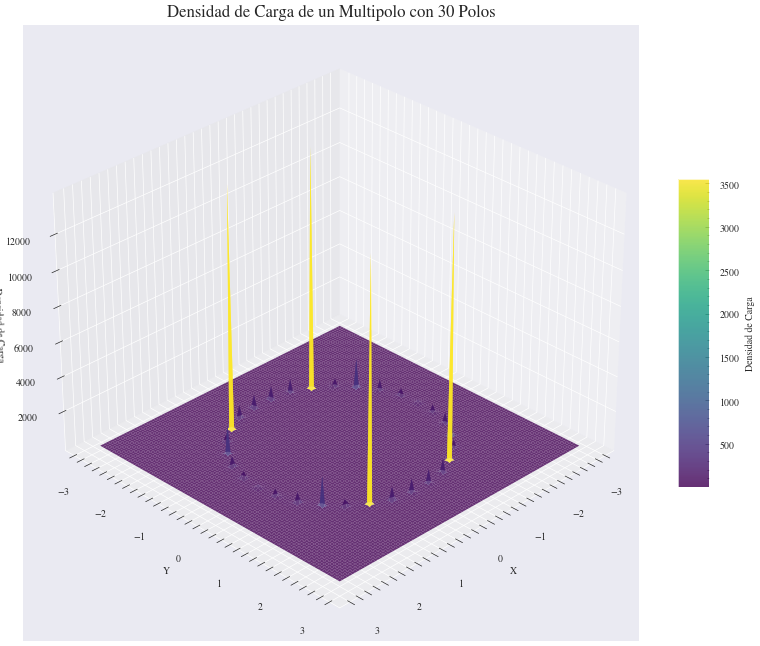

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scienceplots

# Estilo
plt.style.use(['seaborn', 'science', 'nature', 'no-latex'])
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'

# Función para calcular el campo eléctrico debido a un multipolo en un punto específico
def electric_field_due_to_multipole(charge_positions, charge_magnitudes, observation_point):
    k = 9e9  # Constante de Coulomb
    electric_field = np.zeros(2)  # Inicializa el campo eléctrico en cero

    for i in range(len(charge_positions)):
        r = observation_point - charge_positions[i]
        r_magnitude = np.linalg.norm(r)
        electric_field += (k * charge_magnitudes[i] / r_magnitude**3) * r

    return electric_field

# Generaliza el número de polos en el multipolo
N = 30
pole_positions_x = np.array([np.cos(2 * np.pi * i / N) * 2 for i in range(N)])
pole_positions_y = np.array([np.sin(2 * np.pi * i / N) * 2 for i in range(N)])
pole_charges = np.array([(1) ** i for i in range(N)])

# Rango en el eje x y el eje y
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# Calcula la densidad de carga en cada punto de la cuadrícula
density_grid = np.zeros((100, 100))

for i in range(100):
    for j in range(100):
        observation_point = np.array([X[i, j], Y[i, j]])
        density = 0
        for k in range(N):
            r = observation_point - np.array([pole_positions_x[k], pole_positions_y[k]])
            r_magnitude = np.linalg.norm(r)
            density += pole_charges[k] / (np.pi * r_magnitude**2)  # Densidad de carga
        density_grid[i, j] = density

# Crea un gráfico 3D para mostrar la densidad de carga como un terreno
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Crea una superficie tridimensional
surf = ax.plot_surface(X, Y, density_grid, cmap='viridis', rstride=1, cstride=1, alpha=0.8, linewidth=0.5)

# Ajusta la elevación de la superficie para que se vea como un terreno
ax.view_init(elev=30, azim=45)

# Agrega una barra de colores
cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('Densidad de Carga')

# Etiquetas de ejes y título
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Densidad de Carga')
ax.set_title(f'Densidad de Carga de un Multipolo con {N} Polos')

# Muestra el gráfico
plt.show()

## Función auxiliar

In [9]:
# Función para calcular el campo eléctrico debido a un multipolo en un punto específico
def electric_field_due_to_multipole(charge_positions, charge_magnitudes, observation_point):
    k = 9e9  # Constante de Coulomb
    electric_field = np.zeros(2)  # Inicializa el campo eléctrico en cero

    for i in range(len(charge_positions)):
        r = observation_point - charge_positions[i]
        r_magnitude = np.linalg.norm(r)
        electric_field += (k * charge_magnitudes[i] / r_magnitude**3) * r

    return electric_field

## Dipolo eléctrico

Recordemos que el momento del dipolo eléctrico está definido por:

$$
\vec{p} = q\vec{d}
$$

además podemos verlo como dos cargas de signo opuesto separadas por una distancia $\vec{d}$


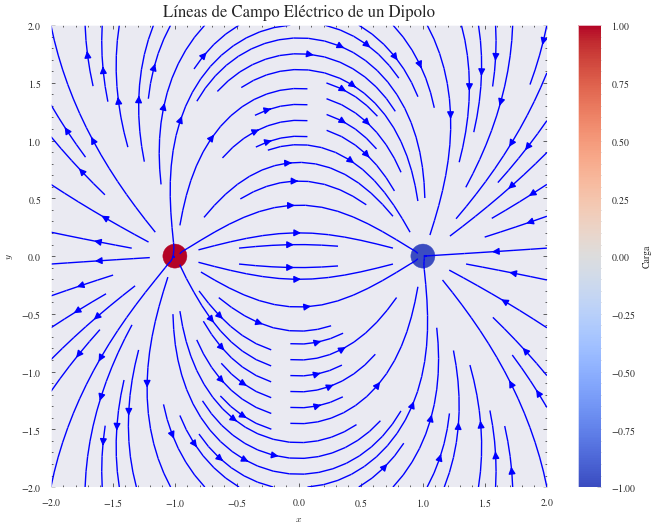

In [13]:
# Coordenadas y magnitudes del dipolo
dipole_positions = np.array([[-1, 0], [1, 0]])  # Dos cargas a lo largo del eje x
dipole_charges = np.array([1, -1])  # Cargas positiva y negativa

# Genera un conjunto de puntos en el plano donde deseas visualizar las líneas de campo eléctrico
x = np.linspace(-2, 2, 100)  # Rango en el eje x
y = np.linspace(-2, 2, 100)  # Rango en el eje y
X, Y = np.meshgrid(x, y)  # Crea una cuadrícula de puntos

# Calcula el campo eléctrico en cada punto de la cuadrícula
electric_field_grid = np.zeros((100, 100, 2))  # Arreglo para almacenar el campo eléctrico en cada punto

for i in range(100):
    for j in range(100):
        observation_point = np.array([X[i, j], Y[i, j]])
        electric_field_grid[i, j] = electric_field_due_to_multipole(dipole_positions, dipole_charges, observation_point)

# Trazar las líneas de campo eléctrico utilizando plt.streamplot
plt.figure(figsize=(8, 6))
plt.streamplot(X, Y, electric_field_grid[:,:,0], electric_field_grid[:,:,1], color='b')
plt.scatter(dipole_positions[:, 0], dipole_positions[:, 1], c=dipole_charges, cmap='coolwarm', s=300)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Líneas de Campo Eléctrico de un Dipolo')
plt.colorbar(label='Carga')
plt.grid()
plt.savefig("dipolo.pdf", bbox_inches='tight')
plt.show()

## Cuadrupolo

Recordemos que el momento cuadrupolar eléctrico está definido por:

$$
Q_{ij} = \sum_k q_k\, r_{ik}\, r_{jk} = \begin{bmatrix}
Q_{xx} & Q_{xy} & Q_{xz} \\
Q_{yx} & Q_{yy} & Q_{yz} \\
Q_{zx} & Q_{zy} & Q_{zz}
\end{bmatrix}
$$

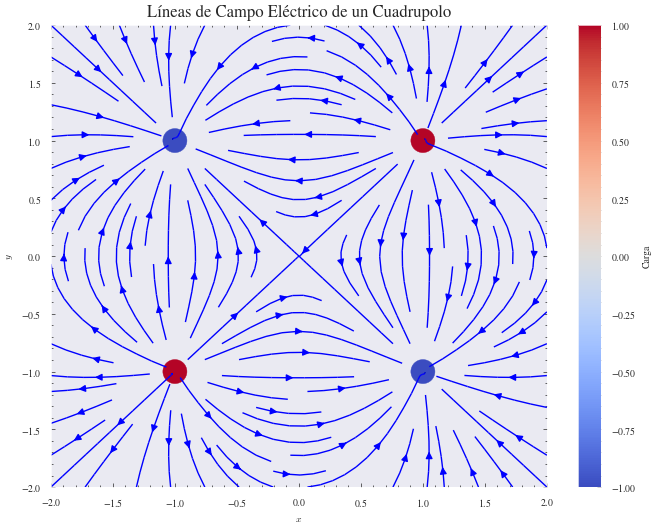

In [32]:
# Coordenadas y magnitudes del cuadrupolo
quadrupole_positions = np.array([[-1, -1], [1, 1], [-1, 1], [1, -1]])  # Cuatro cargas en los vértices de un cuadrado
quadrupole_charges = np.array([1, 1, -1, -1])  # Cargas positivas y negativas

# Genera un conjunto de puntos en el plano donde deseas visualizar las líneas de campo eléctrico
x = np.linspace(-2, 2, 100)  # Rango en el eje x
y = np.linspace(-2, 2, 100)  # Rango en el eje y
X, Y = np.meshgrid(x, y)  # Crea una cuadrícula de puntos

# Calcula el campo eléctrico en cada punto de la cuadrícula
electric_field_grid = np.zeros((100, 100, 2))  # Arreglo para almacenar el campo eléctrico en cada punto

for i in range(100):
    for j in range(100):
        observation_point = np.array([X[i, j], Y[i, j]])
        electric_field_grid[i, j] = electric_field_due_to_multipole(quadrupole_positions, quadrupole_charges, observation_point)

# Trazar las líneas de campo eléctrico utilizando plt.streamplot
plt.figure(figsize=(8, 6))
plt.streamplot(X, Y, electric_field_grid[:,:,0], electric_field_grid[:,:,1], color='b')
plt.scatter(quadrupole_positions[:, 0], quadrupole_positions[:, 1], c=quadrupole_charges, cmap='coolwarm', s=300)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Líneas de Campo Eléctrico de un Cuadrupolo')
plt.colorbar(label='Carga')
plt.grid()
plt.savefig("cuadrupolo.pdf", bbox_inches='tight')
plt.show()

## Hexapolo

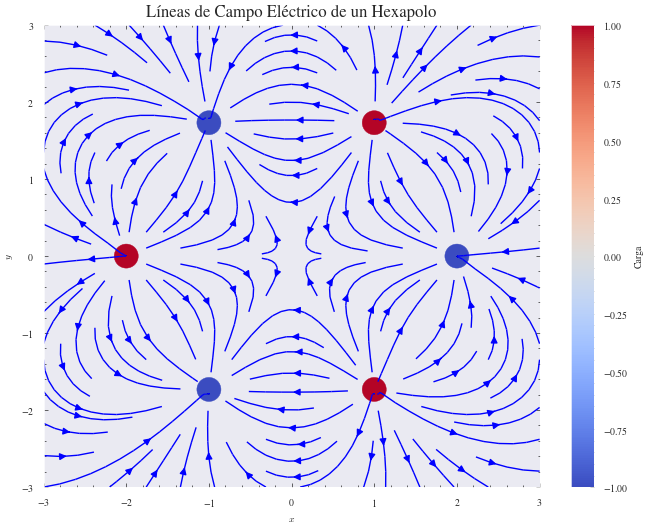

In [33]:
# Coordenadas y magnitudes del hexapolo
hexapole_positions = np.array([[np.cos(np.deg2rad(5*60))*2, np.sin(np.deg2rad(5*60))*2],
                               [np.cos(np.deg2rad(4*60))*2, np.sin(np.deg2rad(4*60))*2],
                               [np.cos(np.deg2rad(3*60))*2, np.sin(np.deg2rad(3*60))*2],
                               [np.cos(np.deg2rad(2*60))*2, np.sin(np.deg2rad(2*60))*2],
                               [np.cos(np.deg2rad(60))*2, np.sin(np.deg2rad(60))*2],
                               [2, 0]])  # Seis cargas en los ejes y diagonales
hexapole_charges = np.array([1, -1, 1, -1, 1, -1])  # Cargas positivas y negativas

# Genera un conjunto de puntos en el plano donde deseas visualizar las líneas de campo eléctrico
x = np.linspace(-3, 3, 100)  # Rango en el eje x
y = np.linspace(-3, 3, 100)  # Rango en el eje y
X, Y = np.meshgrid(x, y)  # Crea una cuadrícula de puntos

# Calcula el campo eléctrico en cada punto de la cuadrícula
electric_field_grid = np.zeros((100, 100, 2))  # Arreglo para almacenar el campo eléctrico en cada punto

for i in range(100):
    for j in range(100):
        observation_point = np.array([X[i, j], Y[i, j]])
        electric_field_grid[i, j] = electric_field_due_to_multipole(hexapole_positions, hexapole_charges, observation_point)

# Trazar las líneas de campo eléctrico utilizando plt.streamplot
plt.figure(figsize=(8, 6))
plt.streamplot(X, Y, electric_field_grid[:,:,0], electric_field_grid[:,:,1], color='b')
plt.scatter(hexapole_positions[:, 0], hexapole_positions[:, 1], c=hexapole_charges, cmap='coolwarm', s=300)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Líneas de Campo Eléctrico de un Hexapolo')
plt.colorbar(label='Carga')
plt.grid()
plt.savefig("hexapolo.pdf", bbox_inches='tight')
plt.show()

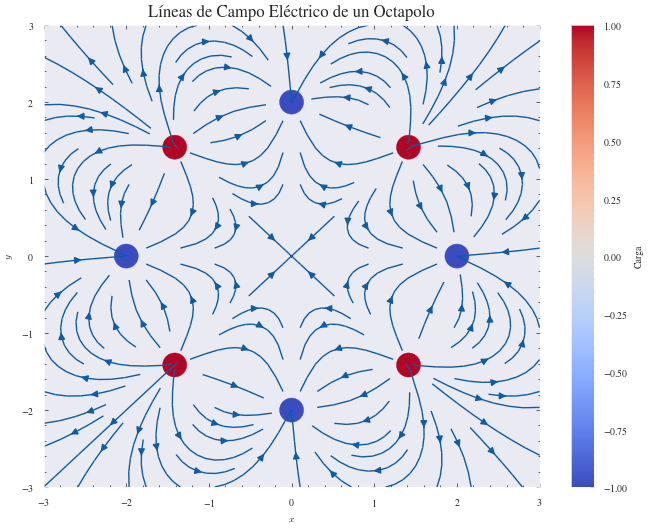

In [34]:
# Coordenadas y magnitudes del octapolo
octapole_positions = np.array([[np.cos(np.deg2rad(7*45))*2, np.sin(np.deg2rad(7*45))*2],
                               [np.cos(np.deg2rad(6*45))*2, np.sin(np.deg2rad(6*45))*2],
                               [np.cos(np.deg2rad(5*45))*2, np.sin(np.deg2rad(5*45))*2],
                               [np.cos(np.deg2rad(4*45))*2, np.sin(np.deg2rad(4*45))*2],
                               [np.cos(np.deg2rad(3*45))*2, np.sin(np.deg2rad(3*45))*2],
                               [np.cos(np.deg2rad(2*45))*2, np.sin(np.deg2rad(2*45))*2],
                               [np.cos(np.deg2rad(45))*2, np.sin(np.deg2rad(45))*2],
                               [2, 0]])  # Ocho cargas en los ejes y diagonales
octapole_charges = np.array([1, -1, 1, -1, 1, -1, 1, -1])  # Cargas positivas y negativas

# Genera un conjunto de puntos en el plano donde deseas visualizar las líneas de campo eléctrico
x = np.linspace(-3, 3, 100)  # Rango en el eje x
y = np.linspace(-3, 3, 100)  # Rango en el eje y
X, Y = np.meshgrid(x, y)  # Crea una cuadrícula de puntos

# Calcula el campo eléctrico en cada punto de la cuadrícula
electric_field_grid = np.zeros((100, 100, 2))  # Arreglo para almacenar el campo eléctrico en cada punto

for i in range(100):
    for j in range(100):
        observation_point = np.array([X[i, j], Y[i, j]])
        electric_field_grid[i, j] = electric_field_due_to_multipole(octapole_positions, octapole_charges, observation_point)

# Trazar las líneas de campo eléctrico utilizando plt.streamplot
plt.figure(figsize=(8, 6))
plt.streamplot(X, Y, electric_field_grid[:,:,0], electric_field_grid[:,:,1], cmap='coolwarm')
plt.scatter(octapole_positions[:, 0], octapole_positions[:, 1], c=octapole_charges, cmap='coolwarm', s=300)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Líneas de Campo Eléctrico de un Octapolo')
plt.colorbar(label='Carga')
plt.grid()
plt.savefig("octapolo.pdf", bbox_inches='tight')
plt.show()

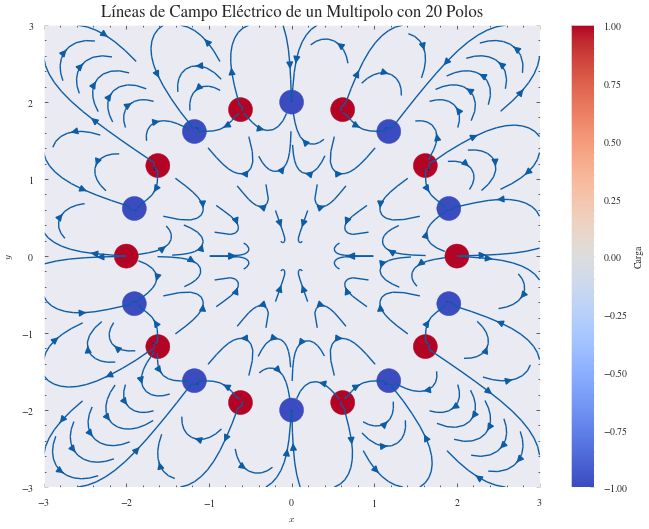

In [36]:
N = 20 # Número de polos en el multipolo
pole_positions_x = np.array([np.cos(2 * np.pi * i / N) * 2 for i in range(N)])
pole_positions_y = np.array([np.sin(2 * np.pi * i / N) * 2 for i in range(N)])
pole_charges = np.array([(-1) ** i for i in range(N)])

x = np.linspace(-3, 3, 100)  # Rango en el eje x
y = np.linspace(-3, 3, 100)  # Rango en el eje y
X, Y = np.meshgrid(x, y)  # Crea una cuadrícula de puntos

# Paso 3: Calcular el campo eléctrico en cada punto de la cuadrícula debido a los polos
electric_field_grid = np.zeros((100, 100, 2))  # Arreglo para almacenar el campo eléctrico en cada punto

for i in range(100):
    for j in range(100):
        observation_point = np.array([X[i, j], Y[i, j]])
        electric_field_grid[i, j] = electric_field_due_to_multipole(np.column_stack((pole_positions_x, pole_positions_y)), pole_charges, observation_point)

# Paso 4: Trazar las líneas de campo eléctrico utilizando plt.streamplot
plt.figure(figsize=(8, 6))
plt.streamplot(X, Y, electric_field_grid[:, :, 0], electric_field_grid[:, :, 1], cmap='coolwarm', density=1)
plt.scatter(pole_positions_x, pole_positions_y, c=pole_charges, cmap='coolwarm', s=300)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(f'Líneas de Campo Eléctrico de un Multipolo con {N} Polos')
plt.colorbar(label='Carga')
plt.grid()
plt.savefig("n-polo.pdf", bbox_inches='tight')
plt.show()